- Données relatives à l'activité partielle dans le cadre de l'épidémie de COVID-19 en France
<https://public.opendatasoft.com/explore/dataset/donnees-relatives-activite-partielle-covid-19-france/table/?dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiU1VNIiwieUF4aXMiOiJyZXF1ZXN0X2tjb3VudCIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiNGRjUxNUEifV0sInhBeGlzIjoibmFjZV9uYW1lIiwibWF4cG9pbnRzIjo1MCwic29ydCI6InNlcmllMS0xIiwiY29uZmlnIjp7ImRhdGFzZXQiOiJkb25uZWVzLXJlbGF0aXZlcy1hY3Rpdml0ZS1wYXJ0aWVsbGUtY292aWQtMTktZnJhbmNlIiwib3B0aW9ucyI6e319fV0sInRpbWVzY2FsZSI6IiIsImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9>

In [1]:
import pandas as pd
import geopandas

import matplotlib.pyplot as plt

## Importing data

In [2]:
activite_partielle_df = pd.read_csv('donnees-relatives-activite-partielle-covid-19-france.csv', sep=';')
dept_geo = geopandas.read_file('departements.geojson', driver='GeoJSON')

In [3]:
activite_partielle_df.head(3)

,Dispositif,Nombre de demandes déposées,Nombre de salariés concernés,Nombre d'heures demandées,Nombre d'établissements concernés,Code Officiel Région,Nom Région,Code Officiel Département,Nom Département,Code Section NACE17,Nom Section NACE17,date_maj,Geo Point,Code ISO 3166 Zone,Nombre de salariés concernés en M,Nombre de demandes déposées en milliers,Nombre d'heures demandées en M,Nombre d'établissements concernés en milliers
0,Activite Partielle,85.0,330.0,106590.0,80.0,84.0,Auvergne-Rhône-Alpes,07,Ardèche,AZ,"Agriculture, sylviculture et pêche",2020-07-21,"44.752802029,4.42552170882",FXX,0.000330,0.085,0.106590,0.080
1,Activite Partielle,25.0,3765.0,1993420.0,25.0,84.0,Auvergne-Rhône-Alpes,07,Ardèche,C4,Fabrication de matériels de transport,2020-07-21,"44.752802029,4.42552170882",FXX,0.003765,0.025,1.993420,0.025
2,Activite Partielle,575.0,4980.0,1512015.0,515.0,84.0,Auvergne-Rhône-Alpes,07,Ardèche,MN,Act. scientif. et tech. ; services admin. et d...,2020-07-21,"44.752802029,4.42552170882",FXX,0.004980,0.575,1.512015,0.515


In [4]:
dept_geo.head(3)

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.03424 46.7908, 3..."


In [5]:
activite_partielle_df['Nom Région'].nunique()

18

## Analysis

In [6]:
quantitative_vars = ['Nombre de salariés concernés en M',
                     'Nombre de demandes déposées en milliers',
                     'Nombre d\'heures demandées en M',
                     'Nombre d\'établissements concernés en milliers']

### Cumul per section

In [7]:
cumul_section = activite_partielle_df.groupby(['Code Section NACE17'])[quantitative_vars].sum().reset_index()

In [8]:
(cumul_section.sort_values('Nombre de salariés concernés en M', ascending=False)).head()

,Code Section NACE17,Nombre de salariés concernés en M,Nombre de demandes déposées en milliers,Nombre d'heures demandées en M,Nombre d'établissements concernés en milliers
14,MN,2.831815,206.215,1107.146935,181.030
8,GZ,2.208570,321.855,1091.891730,291.550
7,FZ,1.516080,191.030,764.449770,171.400
10,IZ,1.262135,181.945,726.285715,155.640
5,C5,1.235860,65.285,604.926925,55.885


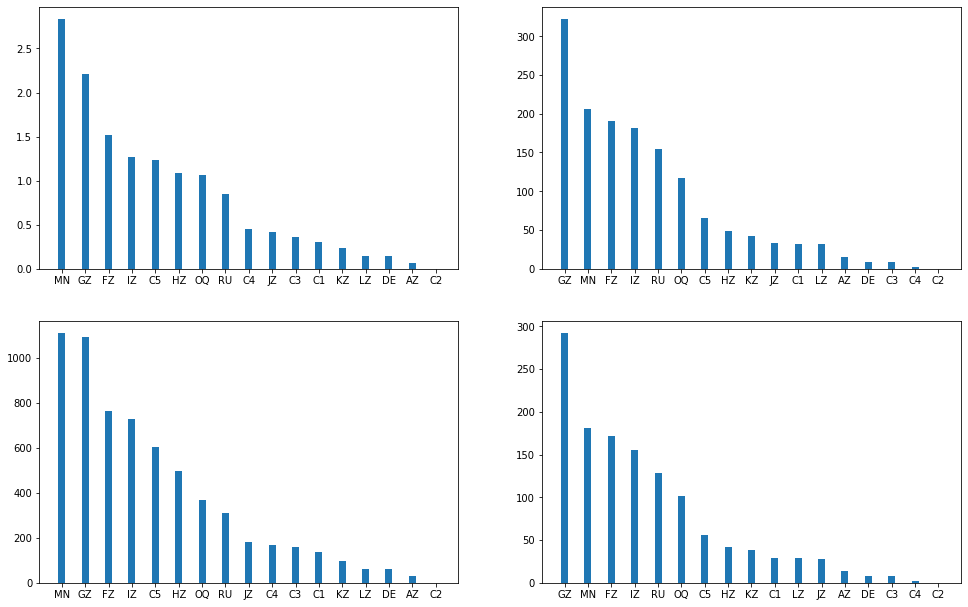

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
width = 0.3

rects00 = ax[0, 0].bar(
    cumul_section.sort_values('Nombre de salariés concernés en M', ascending=False)['Code Section NACE17'],
    cumul_section.sort_values('Nombre de salariés concernés en M', ascending=False)['Nombre de salariés concernés en M'],
    width)
rects01 = ax[0, 1].bar(
    cumul_section.sort_values('Nombre de demandes déposées en milliers', ascending=False)['Code Section NACE17'],
    cumul_section.sort_values('Nombre de demandes déposées en milliers', ascending=False)['Nombre de demandes déposées en milliers'],
    width)
rects10 = ax[1, 0].bar(
    cumul_section.sort_values('Nombre d\'heures demandées en M', ascending=False)['Code Section NACE17'],
    cumul_section.sort_values('Nombre d\'heures demandées en M', ascending=False)['Nombre d\'heures demandées en M'],
    width)
rects11 = ax[1, 1].bar(
    cumul_section.sort_values('Nombre d\'établissements concernés en milliers', ascending=False)['Code Section NACE17'],
    cumul_section.sort_values('Nombre d\'établissements concernés en milliers', ascending=False)['Nombre d\'établissements concernés en milliers'],
    width)



plt.subplots_adjust(hspace=0.2, top=0.9, bottom=0.1, left=0.1, right=0.9)
plt.show()


### Cumul per région

### Map: cumul per department

### Time series: total / per section / per région